# 5.1.4 Linear Regression

This notebook implements linear regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Predict

In [2]:
def predict(w, b, x):
    """ A method that runs our linear model
    w : np.ndarray (1, num_dimensions)
        A weight matrix which will be fit to the data
    b : float (1, 1)
        The bias unit for our linear model
    x : np.ndarray (num_dimensions, num_examples)
        The m input examples for which we would like to predict a y value
    """
    y_pred = w @ x + b
    return y_pred

### Cost Function

In [3]:
def cost(y, y_pred):
    """
    y : np.ndarray (num_examples, 1)
        The ground truth results
    y_pred : np.ndarray (num_examples, 1)
    """
    m, n = y.shape
    squared_error = np.sum((y_pred - y) ** 2)
    mean_squared_error = float(squared_error / n)
    return mean_squared_error

### Initialize Parameters

In [4]:
def initialize_parameters(n):
    return np.zeros((1, n)), 0.0

### Solve

In [5]:
def solve(x, y):
    m, n = x.shape
    x = (np.ones((1, x.shape[1])), x)
    x = np.concatenate(x, axis=0)
    w = np.linalg.inv((x @ x.T)) @ (x @ y.T)
    w, b = w[1:,].reshape(1, m), float(w[0,]) 
    return w, b

### Gradient

In [6]:
def gradient(x, y, y_pred):
    m, n = x.shape
    dw = np.sum((y_pred - y) * x, axis=1) / n
    db = np.sum((y_pred - y)) / n
    return dw, db

### Gradient Descent

In [7]:
def gradient_descent(x, y, w, b, epochs=1000, learning_rate=0.0025):
    m, n = x.shape
    
    for i in range(epochs):
        y_pred = predict(w, b, x)
        
        if not i % (epochs // 10):
            print('epoch #' + str(i), cost(y, y_pred))
        
        dw, db = gradient(x, y, y_pred)
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
    return w, b

### Plot

In [8]:
def plot(x, y, y_pred):
    m, n = x.shape
    if m == 1:
        plt.scatter(x, y)
        plt.plot(x[0], y_pred[0])
        plt.show()
    

def plot3D(x, y, w, b):
    m, n = x.shape
    expand = 2
    x1_min, x1_max = int(np.min(x[0]) * expand), int(np.max(x[0]) * expand)
    x2_min, x2_max = int(np.min(x[1]) * expand), int(np.max(x[1]) * expand)
    x1, x2 = np.meshgrid(range(x1_min, x1_max, (x1_max - x1_min) // 3), range(x2_min, x2_max, (x2_max - x2_min) // 3))
    y_pred = np.zeros(x1.shape)
    for m in range(x1.shape[0]):
        x1i = x1[m,:].reshape(1, x1.shape[1])
        x2i = x2[m,:].reshape(1, x1.shape[1])
        
        xi = np.concatenate((x1i, x2i), axis=0)
        y_predi = predict(w, b, xi)
        y_pred[m,:] = y_predi

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[0], x[1], y)
    ax.plot_surface(x1, x2, y_pred, alpha=0.5)
    plt.show()

### Model

In [9]:
def model(x, y, epochs=50000, learning_rate=0.0025, show=True, normal=False):
    # retrieve the shape of x
    m, n = x.shape
    
    if not normal:
        # initialize w and b to vectors with the appropiate dimensions (zero-valued)
        w, b = initialize_parameters(m)

        # run gradient descent to optomize w and b for x and y
        w, b = gradient_descent(x, y, w, b, epochs=epochs, learning_rate=learning_rate)
        
    else:
        w, b = solve(x, y)
        
        
    c = cost(y, predict(w, b, x))
    
    print('w:', w)
    print('b:', b)
    print('cost:', c)
    
    # if show is True and x is 1 dimensional
    if show and m == 1:
        # plot a line with the scatter plot
        y_pred = predict(w, b, x)
        plot(x, y, y_pred)
    
    # if show is true and x is 2 dimensional
    if show and m == 2:
        plot3D(x, y, w, b)
    

### Test

w: [[ 0.01243055 -0.0246541 ]]
b: 0.02779121634921619
cost: 1.2601132721219128


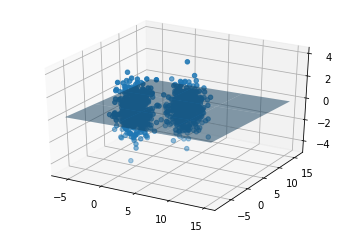

epoch #0 1.2619860225706756
epoch #10000 1.2601132721219155
epoch #20000 1.2601132721219128
epoch #30000 1.2601132721219128
epoch #40000 1.2601132721219128
epoch #50000 1.2601132721219128
epoch #60000 1.2601132721219128
epoch #70000 1.2601132721219128
epoch #80000 1.2601132721219128
epoch #90000 1.2601132721219128
w: [[ 0.01243055 -0.0246541 ]]
b: 0.027791216349214658
cost: 1.2601132721219128


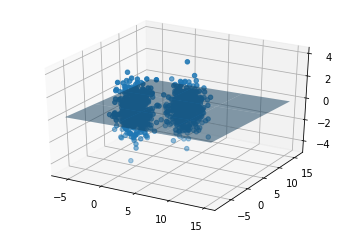

In [10]:
def generate_data(num_samples=100):

    # The desired mean values of the sample.
    mu = np.array([0.0, 5.0, 0.0])

    # The desired covariance matrix.
    r = np.array([
            [  1.25, 1.25, 1.25],
            [  1.25, 1.25, 1.25],
            [  1.25, 1.25, 1.25]
        ])

    # Generate the random samples.
    y = np.random.multivariate_normal(mu, r, size=num_samples)

    x = y[:, 0:2].reshape(2, num_samples)
    y = y[:, 2].reshape(1, num_samples)
    
    return x, y

x, y = generate_data(num_samples=1000)
model(x, y, normal=True)
model(x, y, normal=False, epochs=100000)